# Task 3: Customer Segmentation / Clustering

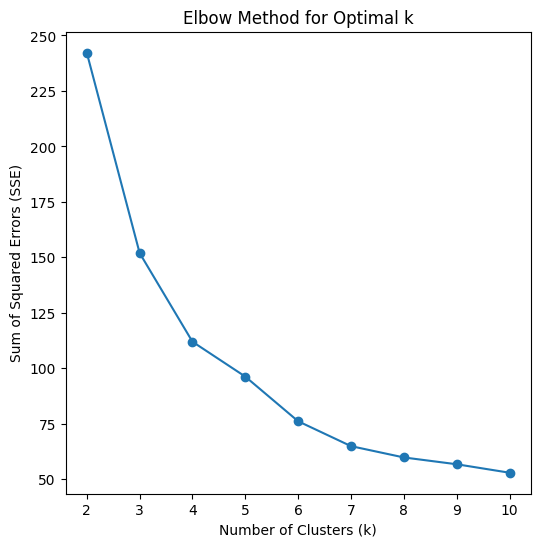

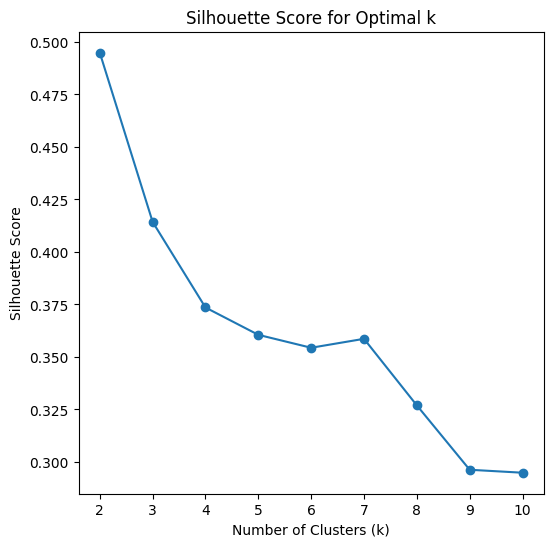

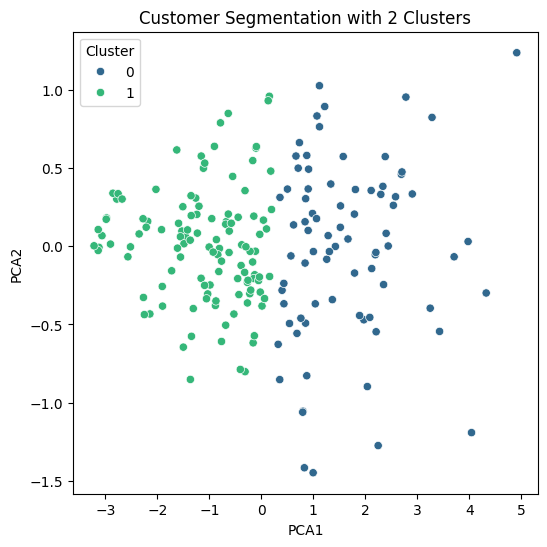

The best Davies-Bouldin Index value is: 0.7233652695141876
The best Silhouette Score is: 0.49487297008885406
The optimal number of clusters (K) based on Silhouette Score is: 2


In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge data
data = pd.merge(customers, transactions, on='CustomerID')

# Feature engineering
data['TotalSpent'] = data['Quantity'] * data['Price']
customer_data = data.groupby('CustomerID').agg({
    'TotalSpent': 'sum',
    'TransactionID': 'count',
    'Quantity': 'sum'
}).rename(columns={'TransactionID': 'TotalTransactions', 'Quantity': 'TotalQuantity'})

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Clustering and selecting best number of K using Elbow method and Silhouette Score
sse = []
silhouette_scores = []
db_indexes = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, labels))
    dbi = davies_bouldin_score(scaled_data, labels)
    db_indexes.append(dbi)

# Plot Elbow Method
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Get best k based on Silhouette Score
best_k = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
customer_data['Cluster'] = best_kmeans.fit_predict(scaled_data)

# Visualize clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
customer_data['PCA1'] = pca_data[:, 0]
customer_data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='viridis')
plt.title(f'Customer Segmentation with {best_k} Clusters')
plt.show()

# Print best metrics
print(f"The best Davies-Bouldin Index value is: {min(db_indexes)}")
print(f"The best Silhouette Score is: {max(silhouette_scores)}")
print(f"The optimal number of clusters (K) based on Silhouette Score is: {best_k}")